verbose 0 (3791: plot.py, generate_plot_points) WARNING: When plotting, failed to evaluate function at 67 points.
verbose 0 (3791: plot.py, generate_plot_points) Last error message: 'can't convert complex to float'


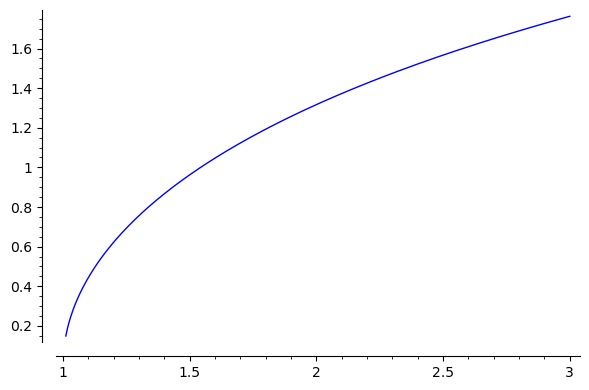

In [1]:
plot(acosh(x), (x,0,3))

In [2]:
x = var("x", domain="positive" )
show( taylor( acosh(1+x), x, 0, 2) )

-1/12*sqrt(2)*x^(3/2) + sqrt(2)*sqrt(x)

In [11]:
show( taylor( cosh(x), x, 0, 4) )

1/24*x^4 + 1/2*x^2 + 1

In [3]:
derivative(atan(x),x)

1/(x^2 + 1)

In [4]:
taylor(atan(1/x),x,0,2)

1/2*pi - x

In [5]:
d = var("d", domain="positive")

In [33]:
def cE(x,d) :
    return 2/x * atan(d/sqrt(1-x**2))

In [37]:
cE(1/10,d).show()

20*arctan(10/33*sqrt(11)*d)

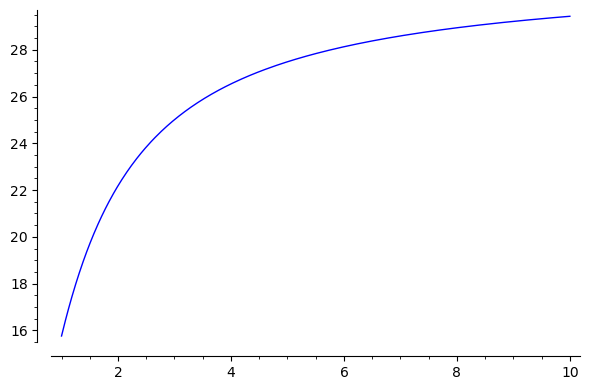

In [38]:
plot( cE(0.1,d), (d,1,10))

In [40]:
@interact

def _( _x = slider(srange(.01,1,.01), default=0.5) ):
    d = var("d", domain="positive")
    plt = plot( cE(_x, d), (d,1,10))
    plt.show()
    return 

In [43]:
cE(x,d).diff(x).show()

-2*arctan(d/sqrt(-x^2 + 1))/x^2 - 2*d/((-x^2 + 1)^(3/2)*(d^2/(x^2 - 1) - 1))

In [52]:
KK=taylor(x**2*(1-x**2)**(1/2)*cE(x,d).diff(x), d, oo, 2)
KK.show()

-pi*sqrt(-x^2 + 1) + 2/d

In [59]:
xc = x.subs(solve( KK , x ))
xc

sqrt(pi^2*d^2 - 4)/(pi*d)

In [60]:
show( cE(xc,d) )

2*pi*d*arctan(d/sqrt(-(pi^2*d^2 - 4)/(pi^2*d^2) + 1))/sqrt(pi^2*d^2 - 4)

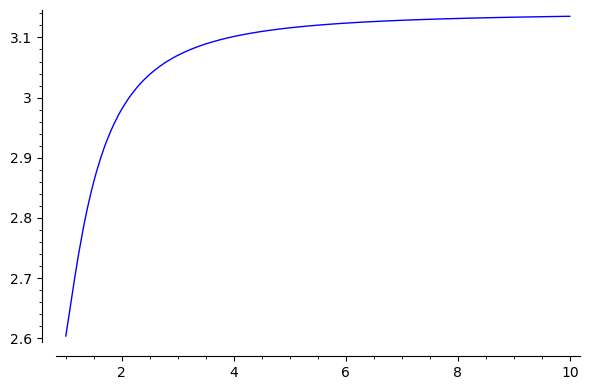

In [61]:
plot(cE(xc,d), (d,1,10))

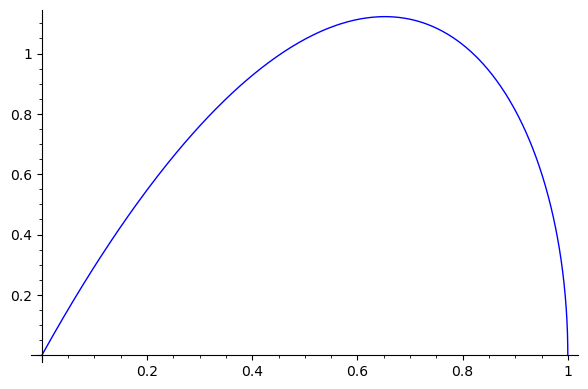

In [26]:
plot( 2*x * atan(sqrt(-1+1/x**2)), (x,0,1) )

In [32]:
xcLoo = find_root( diff( 2*x * atan(sqrt(-1+1/x**2)), x ), 0, 1 )
xcLoo

0.652184623909158

In [33]:
( 2*x * atan(sqrt(-1+1/x**2)) ).subs(x==xcLoo)

1.12219267638209

##  $\rho \sim \frac{ 1 }{ 1+ t^{2\kappa} }$

In [74]:
kappa = var("kappa",domain="positive")

In [85]:
cDeltaS = 2 * d * sqrt(1-(1+d**2)/(x**(2*kappa)+d**2)) / x

### $\kappa = 1$

In [89]:
cDeltaS2 = cDeltaS.subs(kappa==1)

In [90]:
xc2 = solve( diff(cDeltaS2, x) == 0, x)
show(xc2)

[x == -sqrt(sqrt(d^2 + 1) + 1), x == sqrt(sqrt(d^2 + 1) + 1), x == -sqrt(-sqrt(d^2 + 1) + 1), x == sqrt(-sqrt(d^2 + 1) + 1)]

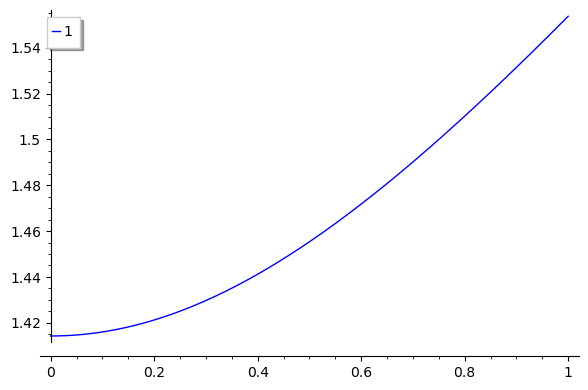

In [91]:
i = 1
pt  = plot(x.subs(xc2[i]), (d,0,1), legend_label=i)
pt.show()

In [92]:
cDeltaS2.subs(xc2[i])

2*d*sqrt(-(d^2 + 1)/(d^2 + sqrt(d^2 + 1) + 1) + 1)/sqrt(sqrt(d^2 + 1) + 1)

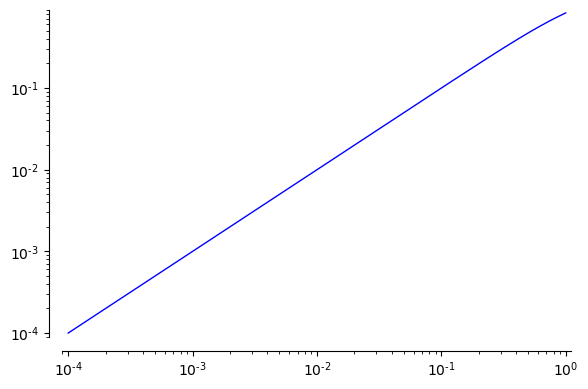

In [94]:
plot_loglog( cDeltaS2.subs(xc2[i]), (d,1e-4,1) )

### $\kappa = 3$

In [40]:
xc = solve( diff(sqrt(1-(1+d**2)/(x**(2*kappa)+d**2)) / x, x).subs(kappa==2) == 0, x)
show(xc)

[x == I*(1/2*d^2 + 1/2*sqrt(d^4 + 10*d^2 + 9) + 3/2)^(1/4), x == -(1/2*d^2 + 1/2*sqrt(d^4 + 10*d^2 + 9) + 3/2)^(1/4), x == -I*(1/2*d^2 + 1/2*sqrt(d^4 + 10*d^2 + 9) + 3/2)^(1/4), x == (1/2*d^2 + 1/2*sqrt(d^4 + 10*d^2 + 9) + 3/2)^(1/4), x == I*(1/2*d^2 - 1/2*sqrt(d^4 + 10*d^2 + 9) + 3/2)^(1/4), x == -(1/2*d^2 - 1/2*sqrt(d^4 + 10*d^2 + 9) + 3/2)^(1/4), x == -I*(1/2*d^2 - 1/2*sqrt(d^4 + 10*d^2 + 9) + 3/2)^(1/4), x == (1/2*d^2 - 1/2*sqrt(d^4 + 10*d^2 + 9) + 3/2)^(1/4)]

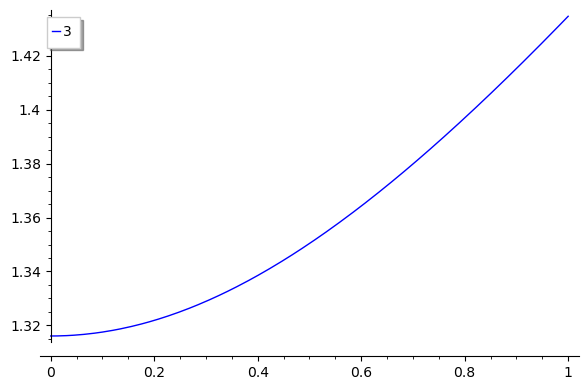

In [63]:
i = 3
pt  = plot(x.subs(xc[i]), (d,0,1), legend_label=i)
pt.show()

In [58]:
x.subs(xc[8])

IndexError: list index out of range

In [103]:
cDeltaL = 2 * atan(sqrt(-1+x**2)) / x

In [104]:
DD = diff( cDeltaL, x)
show(DD)

-2*arctan(sqrt(x^2 - 1))/x^2 + 2/(sqrt(x^2 - 1)*x^2)

In [106]:
xc = find_root(DD, 1,10)
show(xc)
cDeltaL.subs(x==xc)

1.5333081513115205

1.1221926763820902

In [107]:
cEpsL = 2 * atan(d/sqrt(1-x**2)) / x

In [108]:
DD = diff( cEpsL, x)
show(DD)

-2*arctan(d/sqrt(-x^2 + 1))/x^2 - 2*d/((-x^2 + 1)^(3/2)*(d^2/(x^2 - 1) - 1))

In [114]:
assume(x>0)
taylor(arctan(1/x),x,0,3)

1/2*pi + 1/3*x^3 - x

In [117]:
taylor(1/(2*x) * (-1+sqrt(1+4*x)), x, 0, 2)

2*x^2 - x + 1

In [119]:
taylor(sqrt(1+x), x,0,4)

-5/128*x^4 + 1/16*x^3 - 1/8*x^2 + 1/2*x + 1